# bivariate colour mapping
Gilles Ferrand<br>
2019-09-24

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print mpl.__version__
%matplotlib inline

2.1.1


mock data

In [2]:
N = 1000
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X,Y = np.meshgrid(x,y)
data = np.cos(-4*np.pi*X)

In [3]:
error = np.random.rand(N,N)

## univariate cmaps

In [4]:
def plt_show1(array,cmap,vmin,vmax):
    plt.imshow(array,aspect='equal',cmap=cmap,vmin=vmin,vmax=vmax)
    plt.xticks([])
    plt.yticks([])

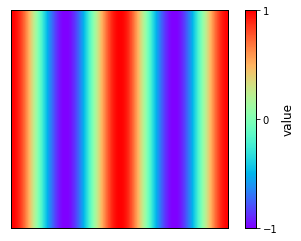

In [5]:
plt_show1(data,cmap='rainbow',vmin=-1,vmax=+1)
plt.colorbar(ticks=[-1,0,1]).set_label("value",size=12)

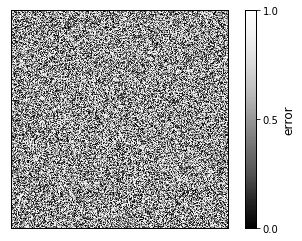

In [6]:
plt_show1(error,cmap='Greys_r',vmin=0,vmax=1)
plt.colorbar(ticks=[0,0.5,1]).set_label("error",size=12)

## bivariate cmap

Matplotlib does not handle bivariate colour maps, but one can do the colour mapping by hand, and ask `imshow()` to display the resulting image. 

### step 1: manual colour mapping

In [7]:
cmap = plt.get_cmap("rainbow")
# colour maps take data values in [0,1]
data_norm = (data - data.min()) / (data.max() - data.min())
# colour maps can be applied directly on an array
RGBA = cmap(data_norm)
print RGBA.shape

(1000, 1000, 4)


In [8]:
def show_channels(RGBA,channels=['R','G','B']):
    fig, ax = plt.subplots(1,3)
    for i in range(len(channels)):
        ax[i].imshow(RGBA[:,:,i],cmap='Greys_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(channels[i])

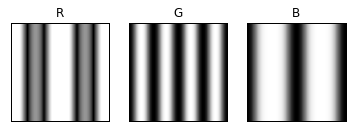

In [9]:
show_channels(RGBA)

In [10]:
# imshow accepts a M×N×3 or M×N×4 array as input
# (then parameters cmap and norm are ignored)
def plt_show2(array):
    fig, ax = plt.subplots()
    ax.imshow(array,aspect='equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

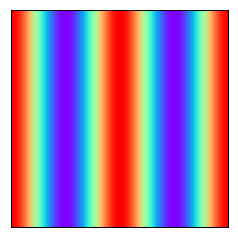

In [11]:
ax = plt_show2(RGBA)

One then also have to make the colour bar manually (this is a just a plot of a ramp function).

In [12]:
ramp_1D = np.linspace(0,1,100)
cbar = np.stack((ramp_1D,ramp_1D)) # it needs some width
RGBA = cmap(cbar)
print RGBA.shape
ax = plt_show2(RGBA)

(2, 100, 4)


Let's assemble the two in one figure

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plt_cbar2(ax,array,extent,size="5%",pad=0.2,xticks=[],yticks=[],xlabel="",ylabel=""):
        # make room for a second plot on the right
        cax = make_axes_locatable(ax).append_axes("right",size=size,pad=pad)
        # show the image of the colour bar
        # note: imshow needs to know the range in data coordinates
        cax.imshow(array,aspect='auto',origin='lower',extent=extent)
        # adjust the ticks and labels
        cax.set_xticks(xticks)
        cax.set_yticks(yticks)
        cax.yaxis.tick_right()
        cax.set_xlabel(xlabel, size=12)
        cax.set_ylabel(ylabel, size=12)
        cax.yaxis.set_label_position("right")

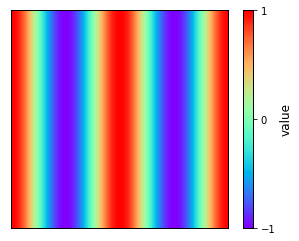

In [14]:
data_RGBA = cmap(data_norm)
ax = plt_show2(data_RGBA)
cbar_RGBA = cmap(np.transpose(cbar))
plt_cbar2(ax,cbar_RGBA,[0,1,-1,+1],xticks=[],yticks=[-1,0,1],ylabel="value")

Now we can use a 2D colour mapping.

### step 2: tweaking the image

Let's weight each colour channel by the error map

In [15]:
data_error_RGBA = np.ones(data_RGBA.shape)
for i in [0,1,2]:
    data_error_RGBA[:,:,i] = np.multiply(data_RGBA[:,:,i],1-error)

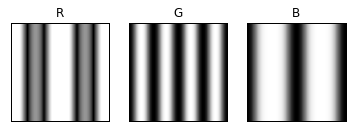

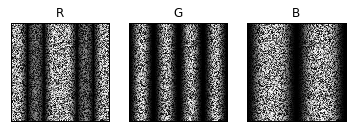

In [16]:
show_channels(data_RGBA)
show_channels(data_error_RGBA)

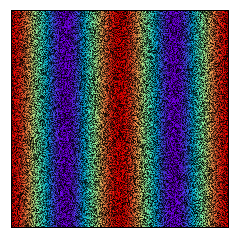

In [17]:
ax = plt_show2(data_error_RGBA)

We add the colour bar, which is now a 2D image as well

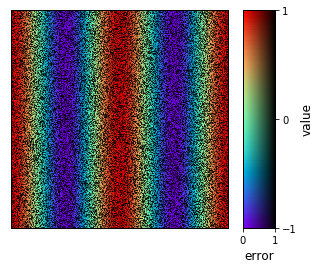

In [18]:
ax = plt_show2(data_error_RGBA)

X,Y = np.meshgrid(ramp_1D,ramp_1D)
cbar_RGBA = cmap(np.transpose(X))
for i in [0,1,2]: cbar_RGBA[:,:,i] *= 1-X[:,:]
plt_cbar2(ax,cbar_RGBA,[0,1,-1,+1],size="15%",xticks=[0,1],yticks=[-1,0,1],xlabel="error",ylabel="value")

Note that we have been working in RGB space for simplicity, but compositing in this space is in general not intuitive. For better control of the colour mapping, one should work in a perceptual colour space (like CIE LCH), so that each channel corresponds to an intuitive dimension of colour (like lightness, chroma, hue).